<a href="https://colab.research.google.com/github/Nimalesh/L2i/blob/main/StyleSpace_single.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Single channel manipulation in S space

In [1]:

!git clone https://github.com/betterze/StyleSpace
%cd StyleSpace


Cloning into 'StyleSpace'...
remote: Enumerating objects: 346, done.
remote: Counting objects: 100% (83/83), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 346 (delta 62), reused 57 (delta 57), pack-reused 263 (from 1)
Receiving objects: 100% (346/346), 155.75 MiB | 17.91 MiB/s, done.
Resolving deltas: 100% (138/138), done.
Updating files: 100% (63/63), done.
/content/StyleSpace


# Select dataset
If you want to use another dataset, please restart runtime.

In [2]:
!mkdir metrics_checkpoint
!gdown https://drive.google.com/drive/folders/1MvYdWCBuMfnoYGptRH-AgKLbPTsIQLhl -O ./metrics_checkpoint --folder

Retrieving folder contents
Processing file 1Q5-AI6TwWhCVM7Muu4tBM7rp5nG_gmCX celebahq-classifier-00-male.pkl
Processing file 1Q5c6HE__ReW2W8qYAXpao68V1ryuisGo celebahq-classifier-01-smiling.pkl
Processing file 1Q7738mgWTljPOJQrZtSMLxzShEhrvVsU celebahq-classifier-02-attractive.pkl
Processing file 1QBv2Mxe7ZLvOv1YBTLq-T4DS3HjmXV0o celebahq-classifier-03-wavy-hair.pkl
Processing file 1QIvKTrkYpUrdA45nf7pspwAqXDwWOLhV celebahq-classifier-04-young.pkl
Processing file 1QJPH5rW7MbIjFUdZT7vRYfyUjNYDl4_L celebahq-classifier-05-5-o-clock-shadow.pkl
Processing file 1QPZXSYf6cptQnApWS_T83sqFMun3rULY celebahq-classifier-06-arched-eyebrows.pkl
Processing file 1QPgoAZRqINXk_PFoQ6NwMmiJfxc5d2Pg celebahq-classifier-07-bags-under-eyes.pkl
Processing file 1QQPQgxgI6wrMWNyxFyTLSgMVZmRr1oO7 celebahq-classifier-08-bald.pkl
Processing file 1QcSphAmV62UrCIqhMGgcIlZfoe8hfWaF celebahq-classifier-09-bangs.pkl
Processing file 1QdWTVwljClTFrrrcZnPuPOR4mEuz7jGh celebahq-classifier-10-big-lips.pkl
Processing file 1

In [7]:
dataset_name='ffhq'
output_path='./npy/ffhq_NT'
!python GetCode.py --dataset_name $dataset_name --output_path $output_path --code_type 'w' --no_truncation
!python GetCode.py --dataset_name $dataset_name --output_path $output_path --code_type 's_flat'
!python GetCode.py --dataset_name $dataset_name --output_path $output_path --code_type 'images'  --resize 256

2025-05-09 23:29:13.144415: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746833353.164677    2866 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746833353.170859    2866 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-09 23:29:13.190855: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
output_path: ./npy/ffhq_NT
Traceback (most recent call last):
  File "/content/StyleSpace/GetCode.py", line 189, in <module>


# Single channel annotation


In [ ]:
# (layer index, channel index)

 # StyleGAN2 FFHQ
configs_ffhq = {
    'black hair' :      [(12, 479)],
    'blond hair ':      [(12, 479), (12, 266)],
    'grey hair ' :      [(11, 286)],
    'wavy hair'  :      [(6, 500), (8, 128), (5, 92), (6, 394), (6, 323)],
    'bangs'      :      [(3, 259), (6, 285), (5, 414), (6, 128), (9, 295), (6, 322), (6, 487), (6, 504)],
    'receding hairline':[(5, 414), (6, 322), (6, 497), (6, 504)],
    'smiling'    :      [(6, 501)],
    'lipstick'   :      [(15, 45)],
    'sideburns'  :      [(12, 237)],
    'goatee'     :      [(9, 421)],
    'earrings'   :      [(8, 81)],
    'glasses'    :      [(3, 288), (2, 175), (3, 120), (2, 97)],
    'wear suit'  :      [(9, 441), (8, 292), (11, 358), (6, 223)],
    'gender'     :      [(9, 6)]
}

# StyleGAN2 Car
configs_car = {
    'front'      :      [(8, 411)],
    'headlights' :      [(8, 441), (9, 355)],
    'grill'      :      [(9, 191)],
     'trees'     :      [(9, 108)],
     'grass'     :      [(12, 107)],
     'sky'       :      [(12, 76)],

     'hubcap'    :      [(12, 113), (12, 439)],
     'car color' :      [(12, 142), (15, 227)],
     'logo'      :      [(9, 185)],
     'wheel angle':     [8, 420],
}


# choose attribute
To mainipulate an specific attribute, please copy the corresponding (layer index, channel index) from above tables and paste in (lindex,cindex) in the next cell

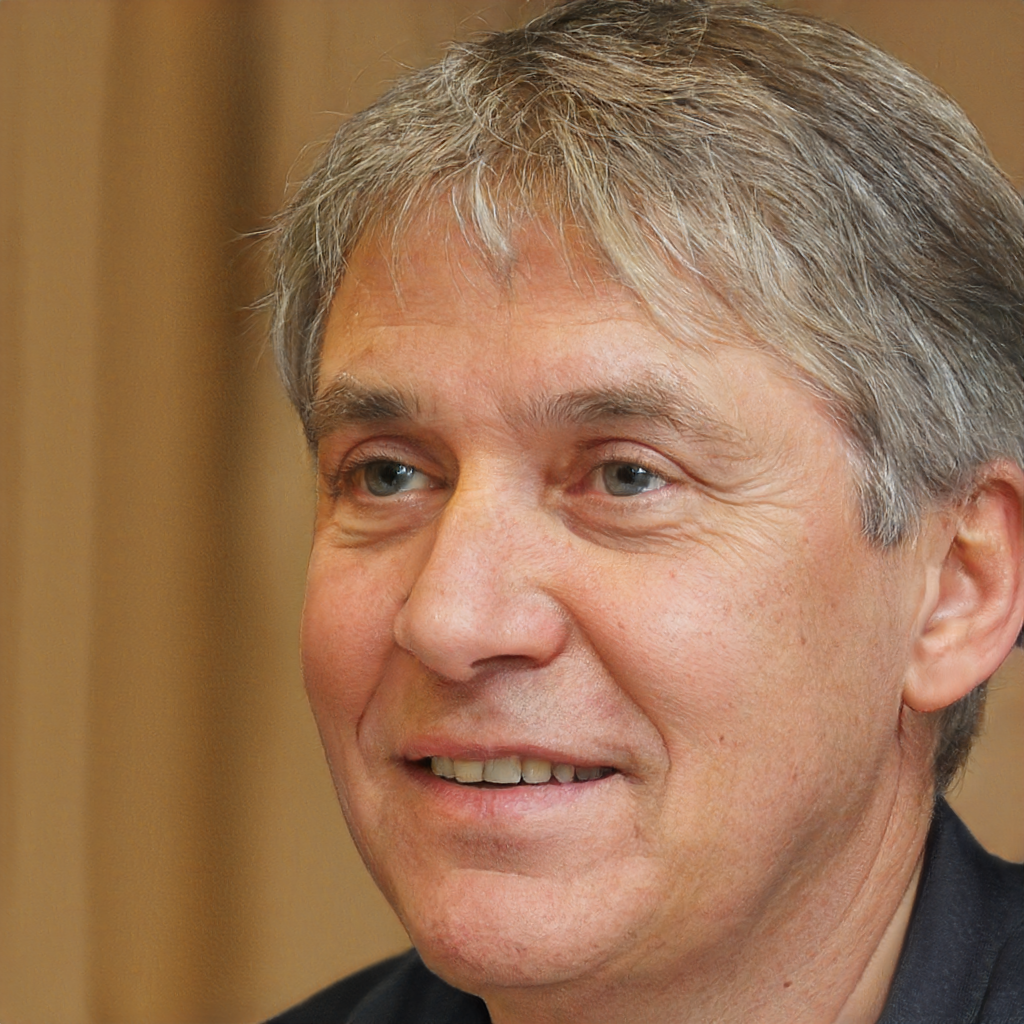

In [ ]:

alpha = 0 #@param {type:"slider", min:-10, max:10, step:0.1}
M.alpha=[alpha] #manipulation strength
M.img_index=1   #index for different images
M.num_images=1
lindex,cindex=9, 6 #(layer index, channel index), please copy from configs in above

M.manipulate_layers=[lindex]
codes,out=M.EditOneC(cindex)
Image.fromarray(out[0,0])
